In [1]:
# Python Library
import os
import glob
import sys
import numpy as np

from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy import units as u
from astropy.io import fits
from astropy.table import Table
from astropy.table import vstack
from astropy.table import hstack
import warnings
warnings.filterwarnings("ignore")

# Plot presetting
import matplotlib.pyplot as plt
import matplotlib as mpl

# Jupyter Setting
mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams['savefig.dpi'] = 500
plt.rc('font', family='serif')

In [2]:
unit = '7DT06'
path_flat_image = f"/lyman/data1/factory/master_frame_1x1_gain2750/{unit}/flat"

In [3]:
images = sorted(glob.glob(f"{path_flat_image}/202*-*.fits"))
print(f"Found {len(images)} images in {path_flat_image}")

Found 181 images in /lyman/data1/factory/master_frame_1x1_gain2750/7DT06/flat


In [7]:
filters = np.unique([val.split('-')[1].replace(".fits", "").replace("n", "") for val in images])
print(f"{len(filters)} FILTERS: {filters}")

7 FILTERS: ['g' 'i' 'm500' 'm600' 'm625' 'm775' 'r']


In [9]:
image_dict = {}
for filte in filters:
	image_dict[filte] = sorted(glob.glob(f"{path_flat_image}/*-n{filte}.fits"))

In [10]:
outbl = Table()
outbl['image'] = images
outbl['filter'] = [val.split('-')[1].replace(".fits", "").replace("n", "") for val in images]
outbl['median_value'] = [-99.0]*len(images)

In [31]:
cutsize = 250

for ii, image in enumerate(images):
	print(f"Processing {ii+1}/{len(images)}: {image}")
	try:
		hdu = fits.open(image)
		data = hdu[0].data
		xsize, ysize = data.shape
		# print(f"Image size: {xsize} x {ysize}")
		# data = data.astype(np.float32)
		center_data = data[int(xsize/2)-cutsize:int(xsize/2)+cutsize, int(ysize/2)-cutsize:int(ysize/2)+cutsize]

		# Calculate the median value of the center region
		median_value = np.median(center_data)
		outbl['median_value'][ii] = median_value

	except Exception as e:
		print(f"Error processing {image}: {e}")
		outbl['median_value'][ii] = -99.0

Processing 1/181: /lyman/data1/factory/master_frame_1x1_gain2750/7DT06/flat/20240313-ng.fits


Processing 2/181: /lyman/data1/factory/master_frame_1x1_gain2750/7DT06/flat/20240313-ni.fits
Processing 3/181: /lyman/data1/factory/master_frame_1x1_gain2750/7DT06/flat/20240313-nm500.fits
Processing 4/181: /lyman/data1/factory/master_frame_1x1_gain2750/7DT06/flat/20240313-nm600.fits
Processing 5/181: /lyman/data1/factory/master_frame_1x1_gain2750/7DT06/flat/20240313-nm625.fits
Processing 6/181: /lyman/data1/factory/master_frame_1x1_gain2750/7DT06/flat/20240313-nm775.fits
Processing 7/181: /lyman/data1/factory/master_frame_1x1_gain2750/7DT06/flat/20240313-nr.fits
Processing 8/181: /lyman/data1/factory/master_frame_1x1_gain2750/7DT06/flat/20240809-ng.fits
Processing 9/181: /lyman/data1/factory/master_frame_1x1_gain2750/7DT06/flat/20240809-ni.fits
Processing 10/181: /lyman/data1/factory/master_frame_1x1_gain2750/7DT06/flat/20240809-nm500.fits
Processing 11/181: /lyman/data1/factory/master_frame_1x1_gain2750/7DT06/flat/20240809-nm600.fits
Processing 12/181: /lyman/data1/factory/master_fra

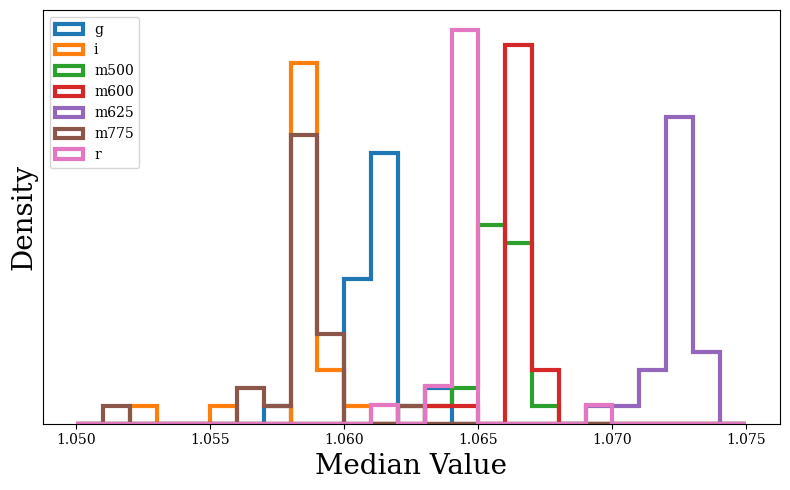

In [32]:
fig = plt.figure(figsize=(8, 5))

bins = np.arange(1.05, 1.075+0.001, 0.001)


for ff, filte in enumerate(filters):
	subtbl = outbl[outbl['filter'] == filte]
	median_values = subtbl['median_value'].data
	# plt.subplot(3, 3, ff+1)
	plt.hist(median_values, histtype='step', lw=3, label=filte, bins=bins, density=True)
plt.legend()
plt.yticks([])
plt.ylabel("Density")
plt.xlabel("Median Value")
plt.tight_layout()

In [34]:
(65*1e3 - 5 - 500)/1.075, (65*1e3 - 5 - 500)/1.050

(59995.348837209305, 61423.80952380952)